In [1]:
import tensorflow as tf

d:\Users\Public\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('d:insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df['sex']  , df['age']

# here some columns are object and some are numerical datatype

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

#### here we need to pass numerical features into our model and also th age which is numerical column it is an array(int64) we need convert it into tensor

### one hot encoding

In [9]:
df_one_hot = pd.get_dummies(df)

In [10]:
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [11]:
## create  x and y values (features and labels)

In [12]:
x = df_one_hot.drop(columns=['charges'])

In [13]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [14]:
y =df_one_hot['charges']

In [15]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#### create training and testing datasets 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [18]:
x_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [19]:
x_train.shape

(1070, 11)

In [20]:
x_test.shape

(268, 11)

### build a neural network 

In [21]:
tf.random.set_seed(42)

model = tf.keras.Sequential(

[
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]


)

model.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.SGD() , metrics =['mae'])

model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 2s 2ms/step - loss: 8619.0713 - mae: 8619.0713
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7865.8188 - mae: 7865.8188
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7505.0688 - mae: 7505.0688
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7708.0327 - mae: 7708.0327
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7662.4351 - mae: 7662.4351
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7644.8579 - mae: 7644.8579
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7635.0659 - mae: 7635.0659
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7742.1050 - mae: 7742.1050
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7574.3706 - mae: 7574.3706
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7779.0815 - mae: 7779.0815

### here we didnt reform this data into tensors because pandas is built in on the top of numpy so tensors know how to deal with numpy arrays 

In [22]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7421.6577 - mae: 7421.6577


[7421.65771484375, 7421.65771484375]

In [23]:
y_train.median() , y_train.mean()

(9575.4421, 13346.089736364489)

In [24]:
model.predict(x_test)

9/9 [==============================] - 0s 3ms/step


array([[ 6910.729  ],
       [ 4082.4934 ],
       [12396.831  ],
       [ 7243.019  ],
       [ 3623.4717 ],
       [ 3464.3787 ],
       [ 1118.107  ],
       [ 9049.413  ],
       [ 3167.8276 ],
       [ 7710.383  ],
       [ 7032.88   ],
       [ 5732.6797 ],
       [ 3282.0046 ],
       [ 9686.145  ],
       [11201.8955 ],
       [ 9597.252  ],
       [ 7018.709  ],
       [ 9350.563  ],
       [ 6557.624  ],
       [ 8415.9375 ],
       [ 3995.2363 ],
       [ 5920.6865 ],
       [  655.20447],
       [ 1255.7047 ],
       [ 7989.1846 ],
       [ 7566.9946 ],
       [ 8335.324  ],
       [ 3550.704  ],
       [ 7240.8286 ],
       [  712.4328 ],
       [ 6326.7485 ],
       [ 8001.2783 ],
       [ 1187.9979 ],
       [ 4478.981  ],
       [ 2391.7278 ],
       [ 5546.11   ],
       [ 1637.3907 ],
       [ 5687.4185 ],
       [10612.628  ],
       [ 7244.9175 ],
       [ 2765.736  ],
       [ 1708.9731 ],
       [ 7948.7676 ],
       [ 8529.806  ],
       [ 4154.4814 ],
       [ 8

### looks like our model isnt performing so well .. lets try to improve it 

In [25]:
# adding extra layers with more hidden units 

In [26]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential(

[
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]


)
model_1.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.Adam() , metrics = ['mae'])

model_1.fit(x_train , y_train , epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13301.7783 - mae: 13301.7783
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13149.0596 - mae: 13149.0596
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12825.6729 - mae: 12825.6729
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12181.1875 - mae: 12181.1875
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11084.7109 - mae: 11084.7109
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9645.0039 - mae: 9645.0039
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8285.2158 - mae: 8285.2158
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7569.0835 - mae: 7569.0835
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7436.3027 - mae: 7436.3027
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7415.0278 - mae:

In [27]:
model_1.evaluate(x_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4927.0698 - mae: 4927.0698


[4927.06982421875, 4927.06982421875]

In [28]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(

[
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]


)
model_2.compile(loss = tf.keras.losses.mae , optimizer = tf.keras.optimizers.Adam() , metrics = ['mae'])

history = model_2.fit(x_train , y_train , epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13284.9443 - mae: 13284.9443
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13124.5762 - mae: 13124.5762
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12772.4814 - mae: 12772.4814
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12075.1836 - mae: 12075.1836
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10918.2793 - mae: 10918.2793
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9459.5186 - mae: 9459.5186
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8142.5264 - mae: 8142.5264
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7520.1670 - mae: 7520.1670
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7420.3379 - mae: 7420.3379
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7400.7212 - mae:

In [29]:
model_1.evaluate(x_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4927.0698 - mae: 4927.0698


[4927.06982421875, 4927.06982421875]

In [30]:
model.evaluate(x_test , y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7421.6577 - mae: 7421.6577


[7421.65771484375, 7421.65771484375]

### Plot history (also known as a loss curve)


## here we are adding the fit the model to history variable history variable has some special functions 

Text(0.5, 0, 'epochs')

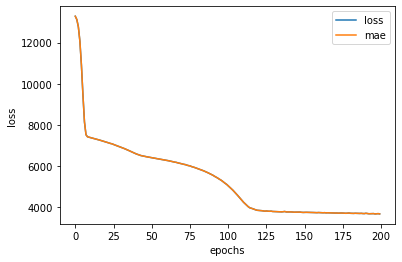

In [31]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## here we can see the loss curve is decreasing 

#### from the above we have still some loss is there so we need to preprocess the data for better accuarcy of our model

### preprocessing data ( normalization and standardization)

In [33]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


Normalization is a technique often applied as a part of data preparation for machine learning . the goal of normalization is to change the values of numeric columns in the dataset to use a common scale , without disorting differcences in the range of values or losing information

<AxesSubplot:ylabel='Frequency'>

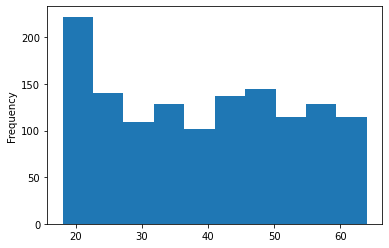

In [34]:
x['age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

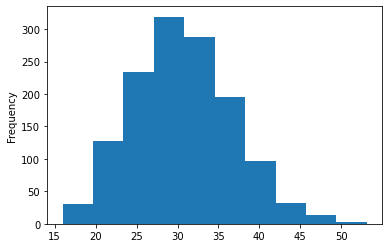

In [35]:
x['bmi'].plot(kind='hist')

In [36]:
x['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

f there is a column called weights with 100 values if we need to normalize (minmax scaling) then


we use formula :    xi= xi-xmin/xmax-xmin

if we apply this a new distribution will be avalilable and range between 0 and 1

d:\Users\Public\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

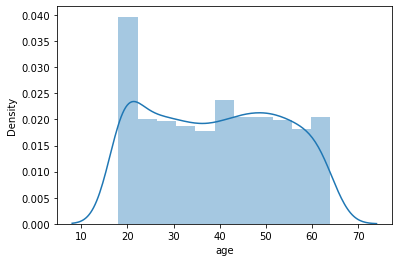

In [37]:
import seaborn as sns

sns.distplot(x['age'])

in terms of scaling values , neural networks tend to prefer normalization 

if ur confused on which to use so use both normalization and standard scaler and check which perform better

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import OneHotEncoder

In [48]:
# create a column Transformer

ct = make_column_transformer(

        (MinMaxScaler() , ['age','bmi','children'] ), # turn all these columns in between 0 and 1
        (OneHotEncoder(handle_unknown ='ignore') , ['sex' , 'smoker' , 'region'])


)

In [49]:
# create x and y values 

x = df.drop('charges' , axis=1)
y = df['charges']

In [50]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [51]:
x_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [52]:
# fit the column transformer to our training data 
ct.fit(x_train)

#transform training and test data with normalization (MinMaxScaler) and OneHotEncoder

x_train_normal = ct.transform(x_train)

x_test_normal = ct.transform(x_test)

In [53]:
# what does our data look like
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [55]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [56]:
x_train_normal.shape # the columns are added extra 

(1070, 11)

In [57]:
x_train.shape

(1070, 6)

## build a neural network model to fit on our normalized data 

In [59]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(

[
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]



)

In [60]:
model_2.compile(loss = tf.keras.losses.mae , optimizer =tf.keras.optimizers.Adam() , metrics =['mae'])

In [61]:
model_2.fit(x_train_normal , y_train ,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.2871 - mae: 13344.2871
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13336.7715 - mae: 13336.7715
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13317.4463 - mae: 13317.4463
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13276.0742 - mae: 13276.0742
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13201.4893 - mae: 13201.4893
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13082.3008 - mae: 13082.3008
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12908.0293 - mae: 12908.0293
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12668.5801 - mae: 12668.5801
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12353.7441 - mae: 12353.7441
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11958.37

In [62]:
# evaluate the model 

model_2.evaluate(x_test_normal , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3442.5442 - mae: 3442.5442


[3442.544189453125, 3442.544189453125]

#### model_1.evaluate(x_test , y_test)

#### 9/9 [==============================] - 0s 2ms/step - loss: 4927.0698 - mae: 4927.0698
#### [4927.06982421875, 4927.06982421875]

so the loss function is reduced by just normalizing and encoding the data 